In [1]:
!unzip MIGGRI.zip

Archive:  MIGGRI.zip
   creating: MIGGRI/
  inflating: MIGGRI/argument.py      
  inflating: MIGGRI/modelStage1_refined.png  
  inflating: MIGGRI/main.sh          
  inflating: MIGGRI/graph.py         
  inflating: MIGGRI/retrain.py       
  inflating: MIGGRI/test.py          
  inflating: MIGGRI/model.py         
  inflating: MIGGRI/readme.md        
  inflating: MIGGRI/MyGNNExplainer.py  
  inflating: MIGGRI/utils.py         
  inflating: MIGGRI/train.py         
  inflating: MIGGRI/modelStage2-refined.png  
  inflating: MIGGRI/explain_main.py  
   creating: MIGGRI/.git/
  inflating: MIGGRI/.git/config      
   creating: MIGGRI/.git/objects/
   creating: MIGGRI/.git/objects/pack/
  inflating: MIGGRI/.git/objects/pack/pack-0be6bde58b92f31022cd8a979342fa4ea80def4f.idx  
  inflating: MIGGRI/.git/objects/pack/pack-0be6bde58b92f31022cd8a979342fa4ea80def4f.pack  
   creating: MIGGRI/.git/objects/info/
 extracting: MIGGRI/.git/HEAD        
   creating: MIGGRI/.git/info/
  inflating: MIGGRI/

In [2]:
%cd /content/MIGGRI

/content/MIGGRI


In [3]:
import os
os.makedirs("model", exist_ok=True)

In [4]:
!pip install dgl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [5]:
!pip install torch==2.2.1
!pip install torchdata==0.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [6]:
!pip install numpy==1.24.4 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.2.1 which is in

In [ ]:
%cd /content/MIGGRI

In [6]:
!python train.py --bidirectional --device cpu

move 11 pos and 1 neg to test.
move 0 pos and 0 neg to val.
In epoch 0, train loss: 1.1581 acc: 0.5050 f1: 0.6711 auc: 0.6571
valid acc: 0.5097 f1: 0.6752 auc: 0.5094
In epoch 2, train loss: 0.8057 acc: 0.5050 f1: 0.6711 auc: 0.7265
valid acc: 0.5097 f1: 0.6752 auc: 0.6083
In epoch 4, train loss: 0.7216 acc: 0.5050 f1: 0.6711 auc: 0.6532
valid acc: 0.5097 f1: 0.6752 auc: 0.5003
In epoch 6, train loss: 0.6837 acc: 0.5050 f1: 0.6711 auc: 0.7816
valid acc: 0.5097 f1: 0.6752 auc: 0.6123
In epoch 8, train loss: 0.6582 acc: 0.5080 f1: 0.6724 auc: 0.7889
valid acc: 0.5655 f1: 0.6981 auc: 0.6919
In epoch 10, train loss: 0.6338 acc: 0.6749 f1: 0.7555 auc: 0.8164
valid acc: 0.6869 f1: 0.7505 auc: 0.7306
In epoch 12, train loss: 0.5936 acc: 0.7320 f1: 0.7892 auc: 0.8677
valid acc: 0.6432 f1: 0.7342 auc: 0.7466
In epoch 14, train loss: 0.6178 acc: 0.6547 f1: 0.7447 auc: 0.8313
valid acc: 0.6359 f1: 0.7312 auc: 0.7618
In epoch 16, train loss: 0.5849 acc: 0.7317 f1: 0.7890 auc: 0.8480
valid acc: 0.6

In [7]:
!python train.py --bidirectional --device cpu --aggr max

move 11 pos and 1 neg to test.
move 0 pos and 0 neg to val.
In epoch 0, train loss: 1.8473 acc: 0.5057 f1: 0.6717 auc: 0.6678
valid acc: 0.5097 f1: 0.6752 auc: 0.5263
In epoch 2, train loss: 1.2775 acc: 0.5057 f1: 0.6717 auc: 0.7179
valid acc: 0.5097 f1: 0.6752 auc: 0.6785
In epoch 4, train loss: 0.6225 acc: 0.5406 f1: 0.6876 auc: 0.8974
valid acc: 0.5121 f1: 0.6763 auc: 0.6818
In epoch 6, train loss: 0.7621 acc: 0.5057 f1: 0.6717 auc: 0.8368
valid acc: 0.5097 f1: 0.6752 auc: 0.7117
In epoch 8, train loss: 0.6319 acc: 0.5177 f1: 0.6771 auc: 0.8904
valid acc: 0.5485 f1: 0.6931 auc: 0.7829
In epoch 10, train loss: 0.6183 acc: 0.5916 f1: 0.7122 auc: 0.8855
valid acc: 0.6311 f1: 0.7305 auc: 0.7826
In epoch 12, train loss: 0.5773 acc: 0.6871 f1: 0.7631 auc: 0.8725
valid acc: 0.7015 f1: 0.7666 auc: 0.7855
In epoch 14, train loss: 0.5478 acc: 0.7520 f1: 0.8008 auc: 0.8795
valid acc: 0.7257 f1: 0.7670 auc: 0.7836
In epoch 16, train loss: 0.5004 acc: 0.7834 f1: 0.8188 auc: 0.8866
valid acc: 0.7

In [8]:
!python train.py --bidirectional --device cpu --aggr mean

move 11 pos and 1 neg to test.
move 0 pos and 0 neg to val.
In epoch 0, train loss: 1.0346 acc: 0.5050 f1: 0.6711 auc: 0.7995
valid acc: 0.5097 f1: 0.6752 auc: 0.5868
In epoch 2, train loss: 0.8415 acc: 0.5050 f1: 0.6711 auc: 0.8569
valid acc: 0.5121 f1: 0.6763 auc: 0.7533
In epoch 4, train loss: 0.5918 acc: 0.6371 f1: 0.7355 auc: 0.9146
valid acc: 0.6699 f1: 0.7472 auc: 0.7842
In epoch 6, train loss: 0.6338 acc: 0.6410 f1: 0.7371 auc: 0.8680
valid acc: 0.6481 f1: 0.7397 auc: 0.7658
In epoch 8, train loss: 0.6038 acc: 0.6724 f1: 0.7546 auc: 0.8803
valid acc: 0.6966 f1: 0.7601 auc: 0.7992
In epoch 10, train loss: 0.5339 acc: 0.7480 f1: 0.7993 auc: 0.8943
valid acc: 0.7233 f1: 0.7711 auc: 0.8177
In epoch 12, train loss: 0.5089 acc: 0.7838 f1: 0.8215 auc: 0.8977
valid acc: 0.7379 f1: 0.7759 auc: 0.8054
In epoch 14, train loss: 0.4996 acc: 0.7862 f1: 0.8221 auc: 0.8961
valid acc: 0.7476 f1: 0.7833 auc: 0.8107
In epoch 16, train loss: 0.4775 acc: 0.8053 f1: 0.8355 auc: 0.9114
valid acc: 0.7

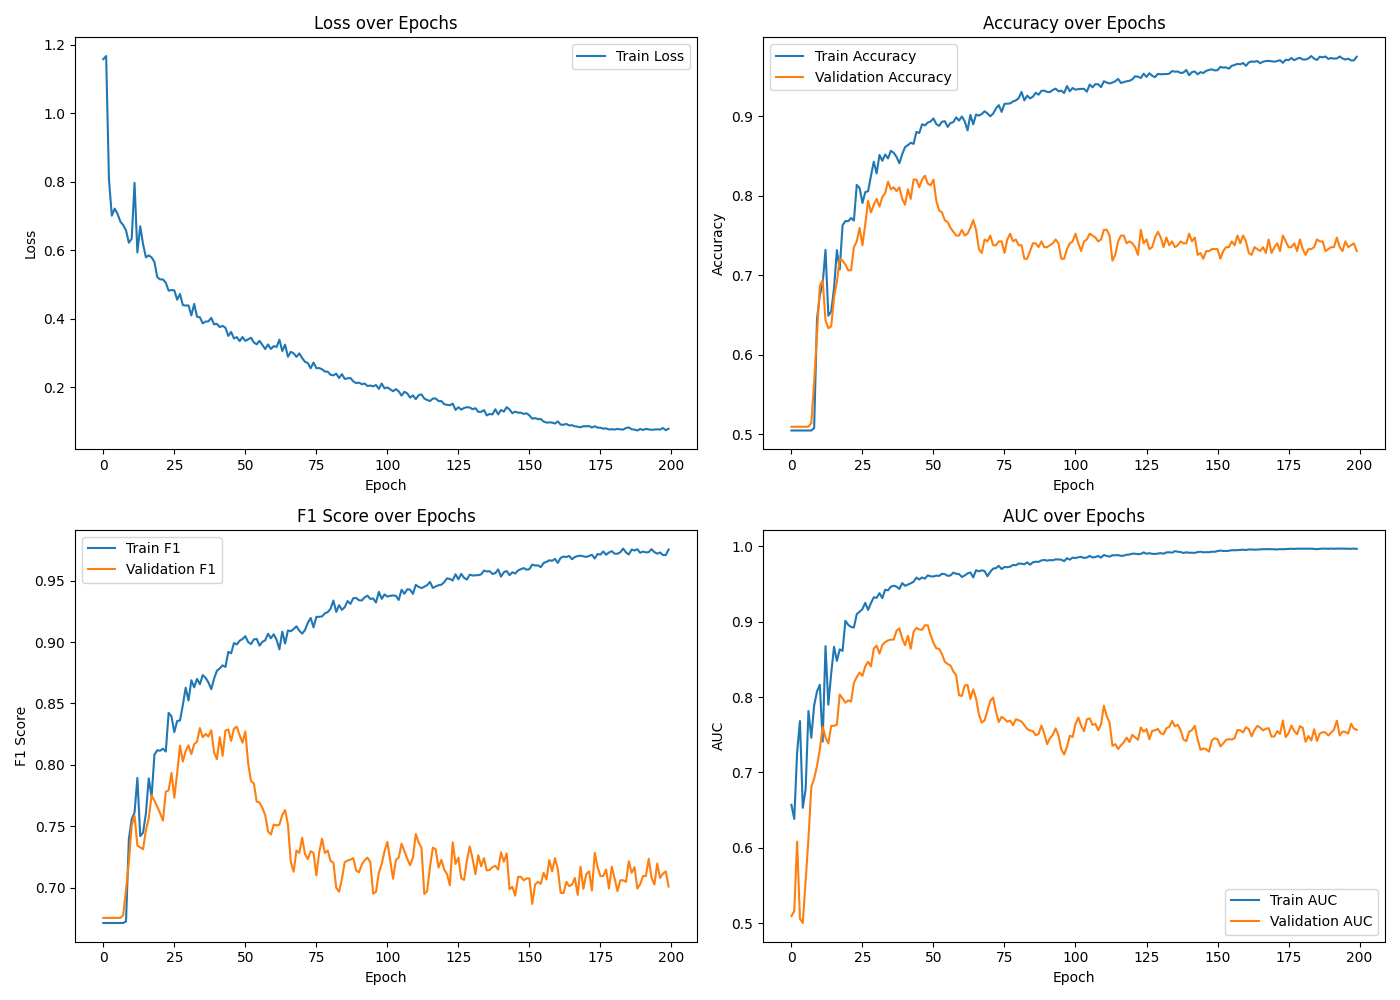

In [9]:
from IPython.display import Image, display
display(Image(filename='training_metrics_lstm.png'))

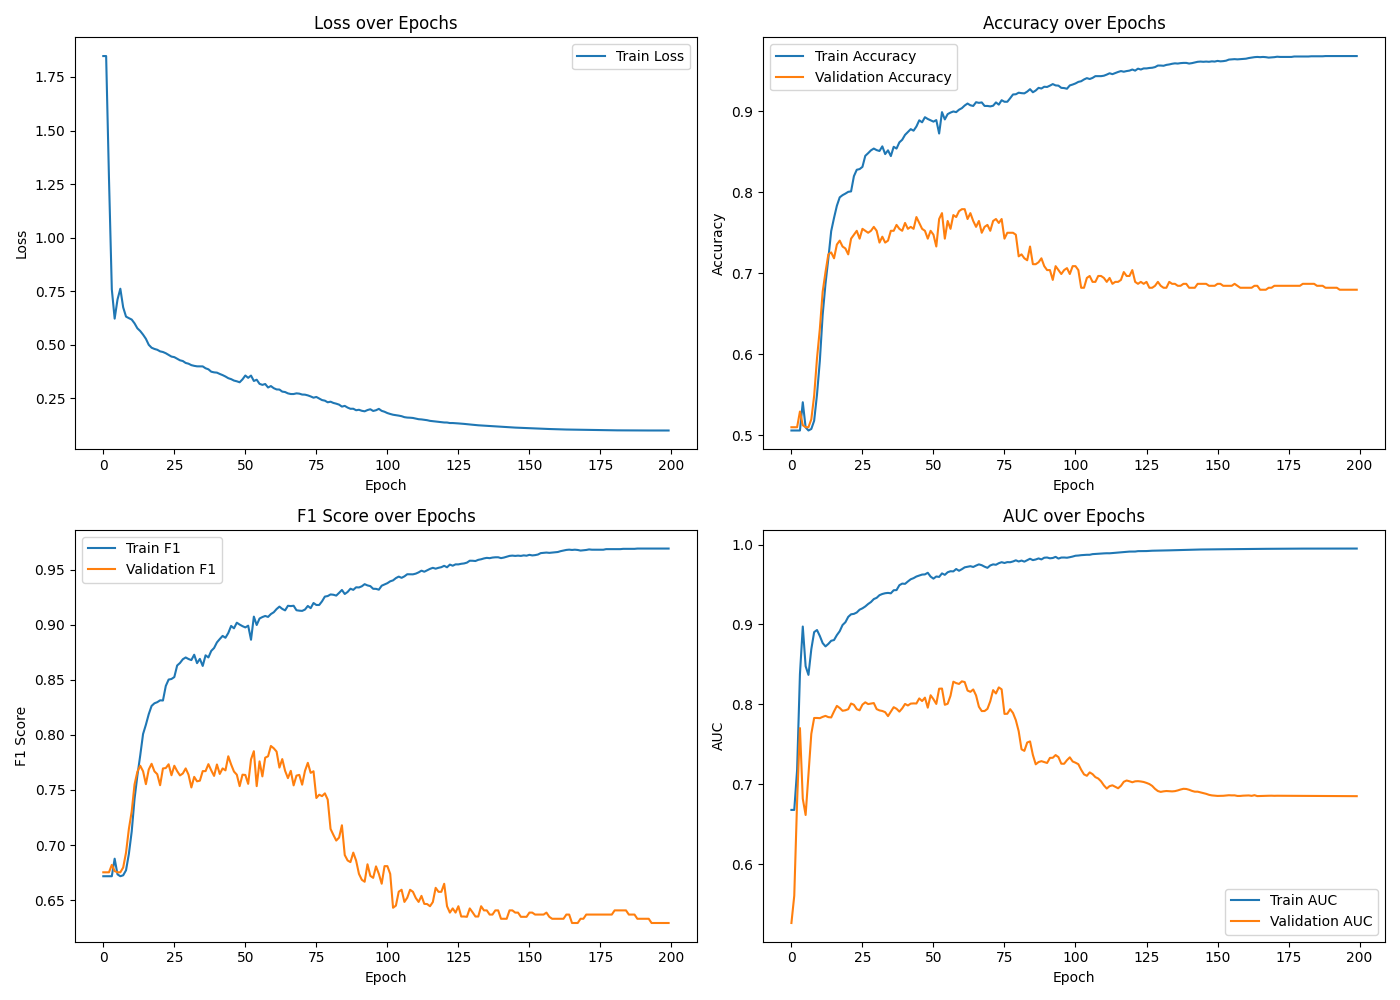

In [10]:
from IPython.display import Image, display
display(Image(filename='training_metrics_max.png'))

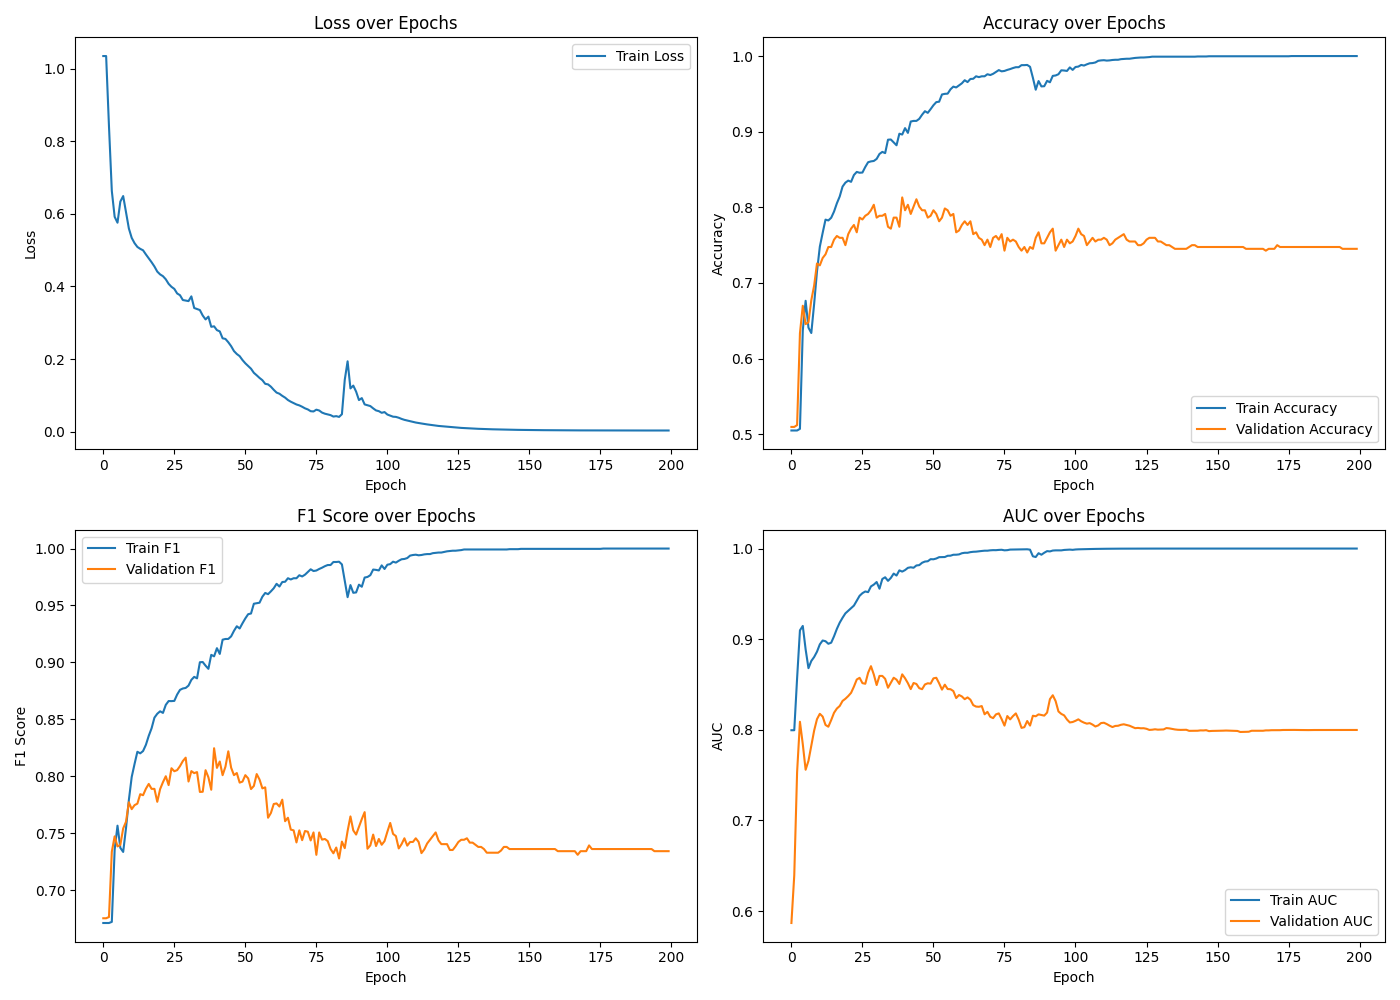

In [11]:
from IPython.display import Image, display
display(Image(filename='training_metrics_mean.png'))

In [12]:
!python test.py --model1 /content/MIGGRI/model/lstm_sage_dot_testIdx2_best.pkl --model2 /content/MIGGRI/model/max_sage_dot_testIdx2_best.pkl --model3 /content/MIGGRI/model/mean_sage_dot_testIdx2_best.pkl

Namespace(CNNFeatureExtractor='con', FeatureAggregationMode='mean', FeatureDim=128, HiddenLayerDim=128, Epoch=200, lr=0.05, warmup=True, warmup_portion=0.2, test_idx=2, mini_batch_len=5, mini_batch_pattern='data/rr_mini_batch_%s.pkl', valid_ratio=0.1, device='cpu', torch_random_seed=0, bidirectional=True, gnn='sage', aggr='lstm', Predictor='dot')
move 11 pos and 1 neg to test.
move 0 pos and 0 neg to val.
test acc: 0.8066 f1: 0.8107 auc: 0.8646
Namespace(CNNFeatureExtractor='con', FeatureAggregationMode='mean', FeatureDim=128, HiddenLayerDim=128, Epoch=200, lr=0.05, warmup=True, warmup_portion=0.2, test_idx=2, mini_batch_len=5, mini_batch_pattern='data/rr_mini_batch_%s.pkl', valid_ratio=0.1, device='cpu', torch_random_seed=0, bidirectional=True, gnn='sage', aggr='max', Predictor='dot')
move 11 pos and 1 neg to test.
move 0 pos and 0 neg to val.
test acc: 0.7972 f1: 0.8044 auc: 0.8486
Namespace(CNNFeatureExtractor='con', FeatureAggregationMode='mean', FeatureDim=128, HiddenLayerDim=128,

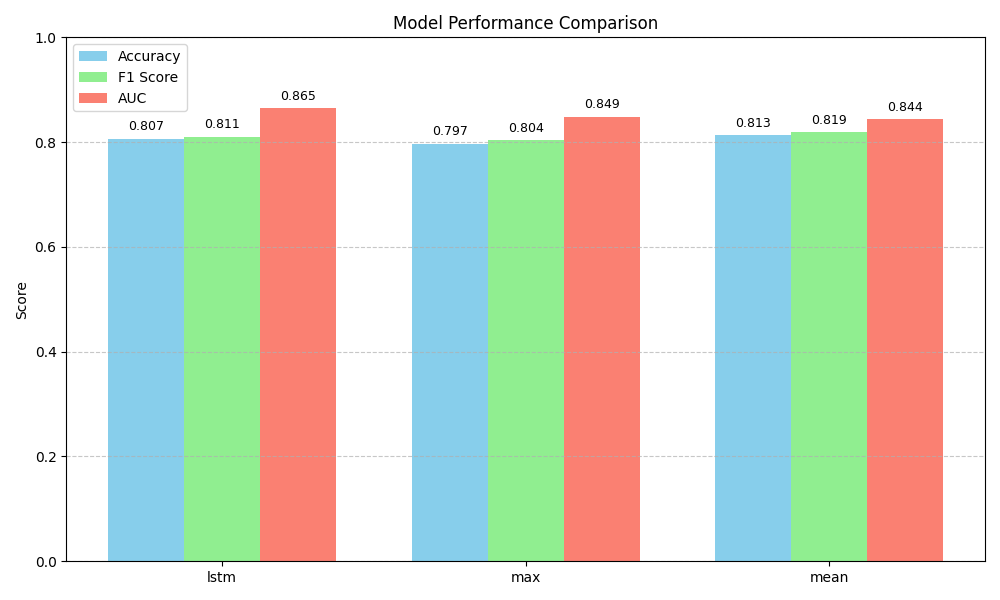

In [13]:
from IPython.display import Image, display
display(Image(filename='test_metrics.png'))